In [1]:
#!pip install mpl_finance
#!pip install --upgrade mplfinance

In [2]:
# First import the libraries that we need to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
from datetime import datetime

In [3]:
bc = pd.read_csv('Data/file.csv')
bc

Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2580  2021-10-14  57372.832031  58478.734375  56957.074219  57321.523438   
2581  2021-10-15  57345.902344  62757.128906  56868.144531  61593.949219   
2582  2021-10-16  61609.527344  62274.476563  60206.121094  60892.179688   
2583  2021-10-17  60887.652344  61645.523438  59164.468750  61553.617188   
2584  2021-10-18  61548.804688  62614.660156  60012.757813  62026.078125   

         Adj Close        Volume  
0       457.334015  2.105680e+07  
1       424.440002  3.448320e+07  
2       394.795990  3.791970e+07  
3       408.903992  3.686360e+07  
4       398.821014  2.658010e+07  
...            ...           ...  
2580  57321.523438  3.661579e+10  
2581  61593.949219  5.178008e+10  
2582  60892.179688  3.425096e+10  
2583  61553.617188  2.903237e+10  
2584  62026.078125  3.805556e+10  

[2585 rows x 7 columns]

In [4]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2585 non-null   object 
 1   Open       2585 non-null   float64
 2   High       2585 non-null   float64
 3   Low        2585 non-null   float64
 4   Close      2585 non-null   float64
 5   Adj Close  2585 non-null   float64
 6   Volume     2585 non-null   float64
dtypes: float64(6), object(1)
memory usage: 141.5+ KB


In [5]:
bc.describe()

Open          High           Low         Close     Adj Close  \
count   2585.000000   2585.000000   2585.000000   2585.000000   2585.000000   
mean    9440.183635   9709.107956   9152.887871   9463.208730   9463.208730   
std    13845.719510  14264.270078  13386.815046  13882.274756  13882.274756   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      577.752991    582.817993    573.429993    577.502991    577.502991   
50%     5505.552246   5642.044434   5347.645996   5526.640137   5526.640137   
75%     9698.502930   9908.796875   9507.637695   9700.414063   9700.414063   
max    63523.753906  64863.097656  62208.964844  63503.457031  63503.457031   

             Volume  
count  2.585000e+03  
mean   1.374584e+10  
std    1.989186e+10  
min    5.914570e+06  
25%    7.406470e+07  
50%    4.566910e+09  
75%    2.219800e+10  
max    3.509679e+11

In [6]:
#Creates a new column called 'Return' that is the percentage change from the previous column 
#on the adjusted closing price
bc['Return'] = bc['Adj Close'].pct_change()
bc.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

       Volume    Return  
0  21056800.0       NaN  
1  34483200.0 -0.071926  
2  37919700.0 -0.069843  
3  36863600.0  0.035735  
4  26580100.0 -0.024659

Text(0.5, 1.0, 'Opening Price vs. Date')

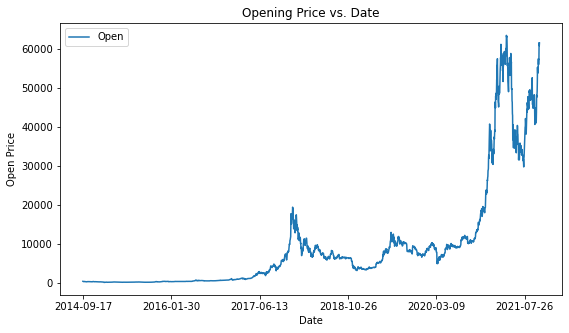

In [7]:
bc.plot('Date', 'Open', figsize = (9,5))
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Opening Price vs. Date')

Text(0.5, 1.0, 'Closing Price vs. Date')

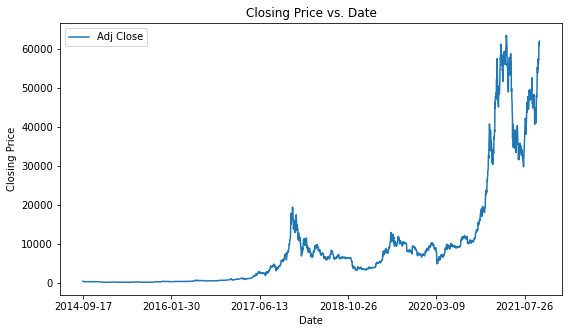

In [8]:
bc.plot('Date', 'Adj Close', figsize = (9,5))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price vs. Date')

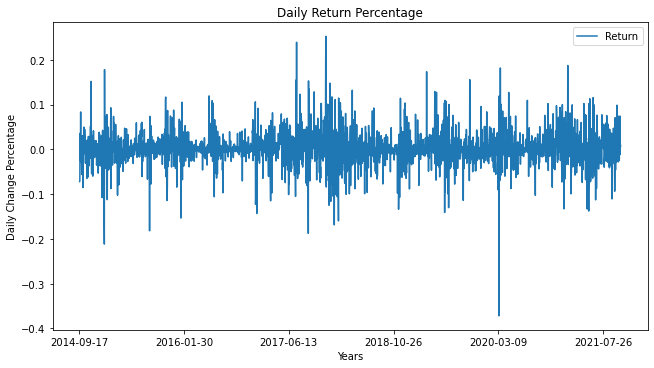

In [9]:
bc.plot('Date', 'Return', figsize=(9,5))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Daily Change Percentage')
plt.title("Daily Return Percentage")
plt.show()

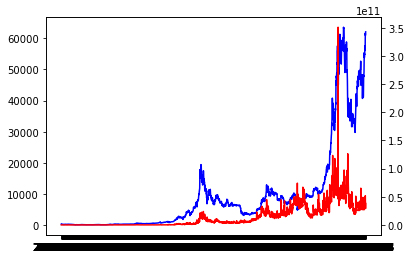

In [10]:
fig, ax = plt.subplots()
ax.plot(bc['Date'], bc['Adj Close'], color = 'blue')
ax2 = ax.twinx()
ax2.plot(bc['Date'], bc['Volume'], color = 'red')
plt.show()

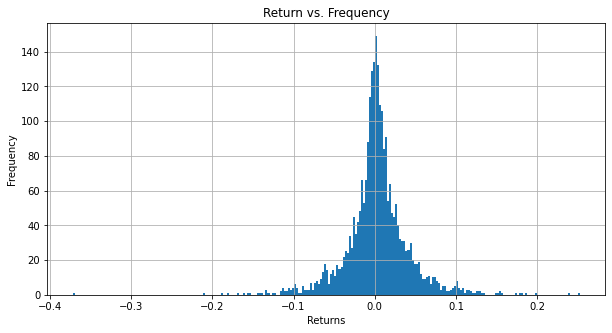

In [11]:
bc.hist('Return', bins = 250, figsize = (10,5))
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Return vs. Frequency')
plt.show()

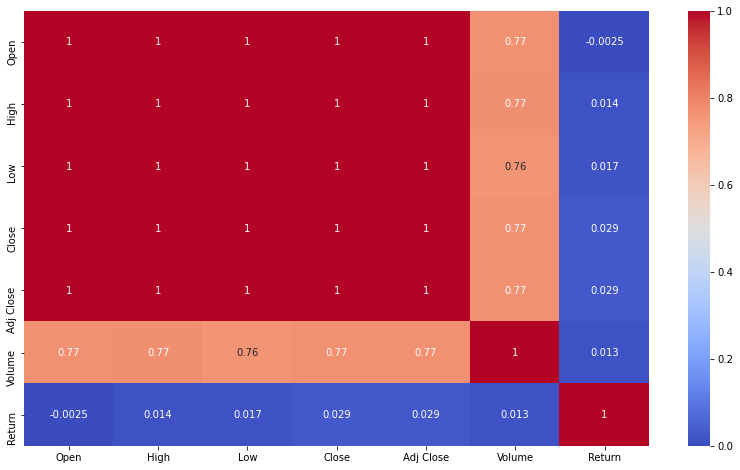

In [12]:
plt.figure(figsize=(14,8))
sns.heatmap(bc.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);

From the heat map, the main attribute of test will be Volume. 

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Return'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

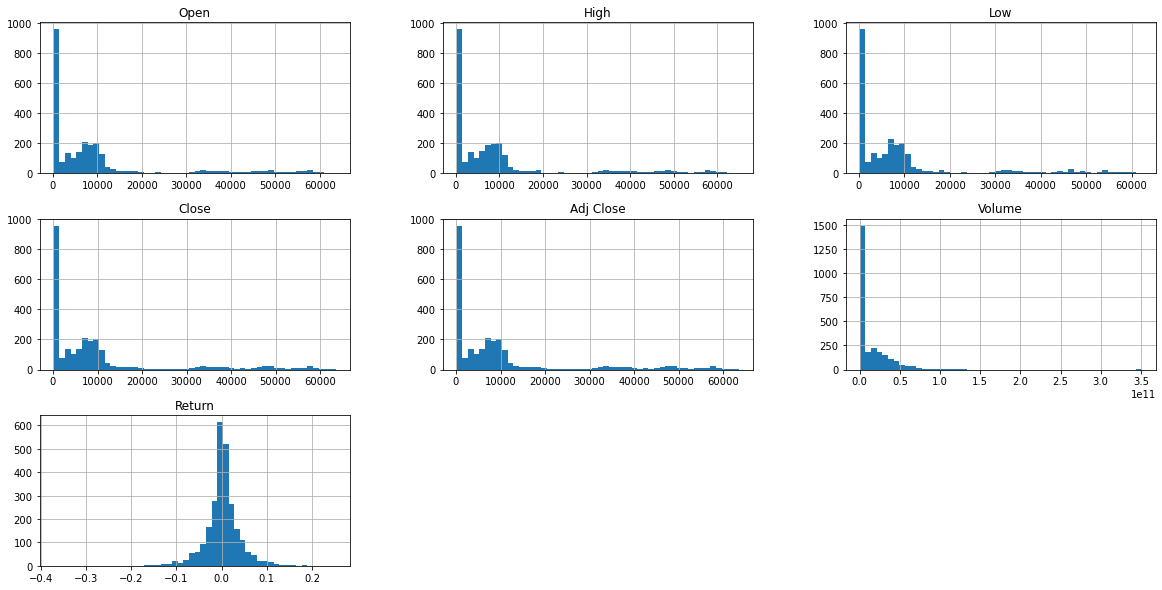

In [13]:
bc.hist(bins = 50, figsize = (20,10))

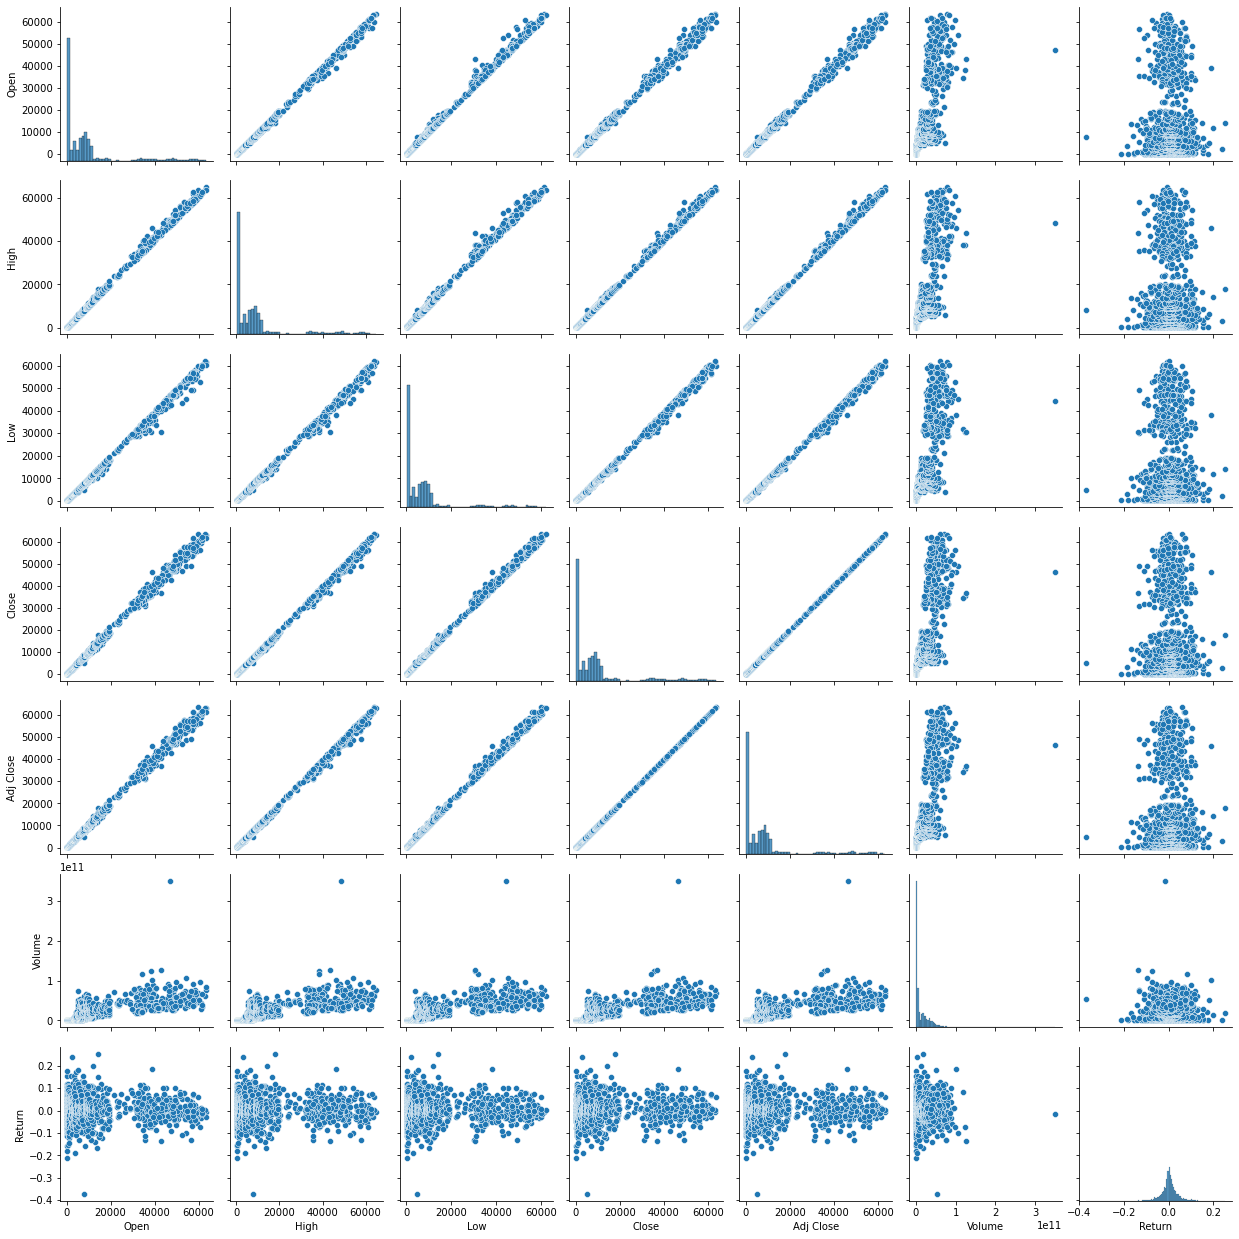

In [14]:
sns.pairplot(bc)

<AxesSubplot:ylabel='Density'>

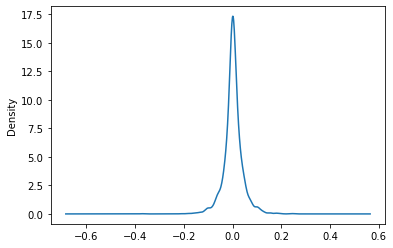

In [15]:
bc['Return'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

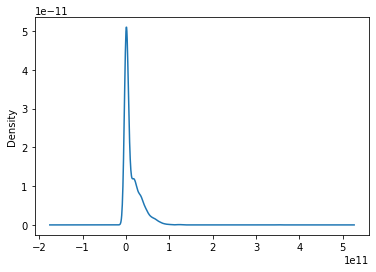

In [16]:
bc['Volume'].plot(kind = 'kde')

C:\Users\falda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

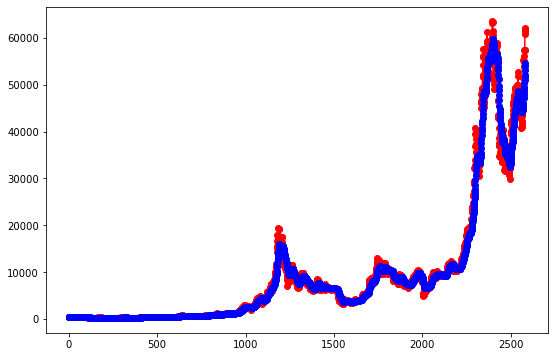

In [17]:
#exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(bc['Adj Close']).fit(smoothing_level = 0.1, optimized = False)

bc['Adj Close'].plot(marker = 'o', color = 'red', figsize = (9,6))
model.fittedvalues.plot(marker = 'o', color ='blue')

The model line is a really good fit for the data. Further statsmodels prediction can be done with Arima

In [18]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

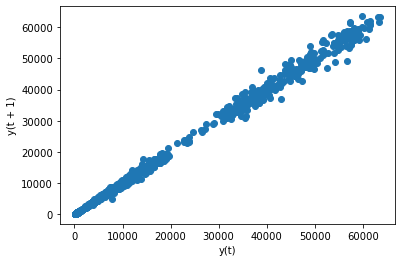

In [19]:
lag_plot(bc['Adj Close'])

This shows that the data are strongly non-random and further suggests that an autoregressive model might be appropriate. The tighter the data is clustered around the diagonal, the more autocorrelation is present.

A stationary time series is one whose properties do not depend on the time at which the series is observed. Bitcoin value varies to highly due to multiple factors such as social medica and government policy. 

In [20]:
#Create a column to return the day of the week matching the date

bc['Date'] = pd.to_datetime(bc['Date']) #Had to redo otherwise errors appeared
week={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
bc['Day of Week'] = bc['Date'].dt.dayofweek.map(week)

bc.head()

Date        Open        High         Low       Close   Adj Close  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

       Volume    Return Day of Week  
0  21056800.0       NaN         Wed  
1  34483200.0 -0.071926         Thu  
2  37919700.0 -0.069843         Fri  
3  36863600.0  0.035735         Sat  
4  26580100.0 -0.024659         Sun

A positive linear trend is suggestive of positive autocorrelation.
The tighter the data is clustered around the diagonal, the more autocorrelation is present.

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

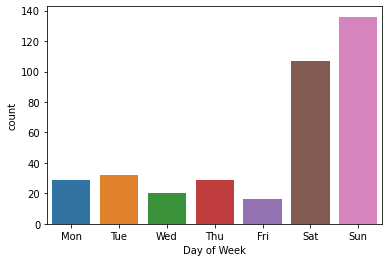

In [21]:
bc['Date'] = pd.to_datetime(bc['Date']) #Had to redo otherwise errors appeared

# count min value for each week day
idx = bc.groupby([pd.Grouper(key='Date', freq='W-MON')])['Volume'].transform(min) == bc['Volume']

# calculate data for days.
# W-MON = weekly frequency (Mondays)
lows_count = bc[idx].groupby([pd.Grouper(key='Date', freq='D')]).first().reset_index()
lows_count = lows_count.dropna()


sns.countplot(x='Day of Week',data=lows_count, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

I wanted to see which days had the largest trading volumes, and we see that those days are Saturday and Sunday

In [22]:
import mplfinance as mpf

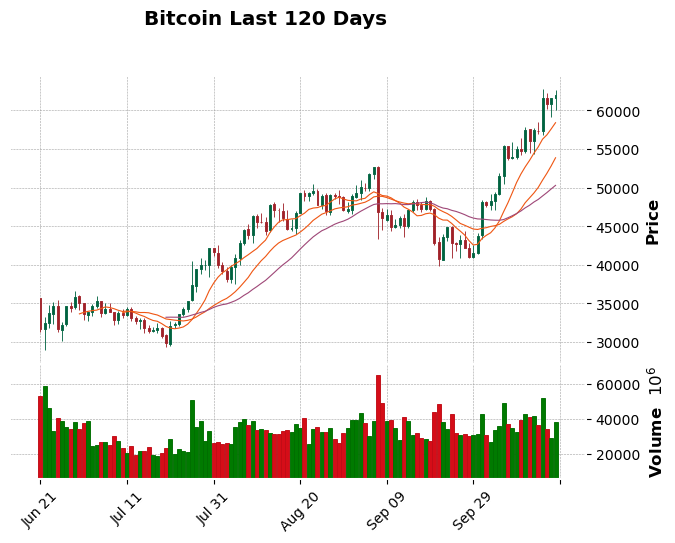

In [23]:
#Limit data so that it becomes easier to see
mpf.plot(bc.set_index('Date').tail(120), 
        type='candle', style='charles', volume=True, 
        title='Bitcoin Last 120 Days', mav=(10,20,30)) #moving average

From the last 120 days, we see the price continues to fluctuate. A decrease in price occurred during the month of September 2021 and has since been on the rise again. 

In [24]:
bc.to_csv('%s/file1.csv'%("C:/Users/falda/OneDrive/Desktop/Springboard Assignments/Springboard/Capstone Project/Data"), index = False)